In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

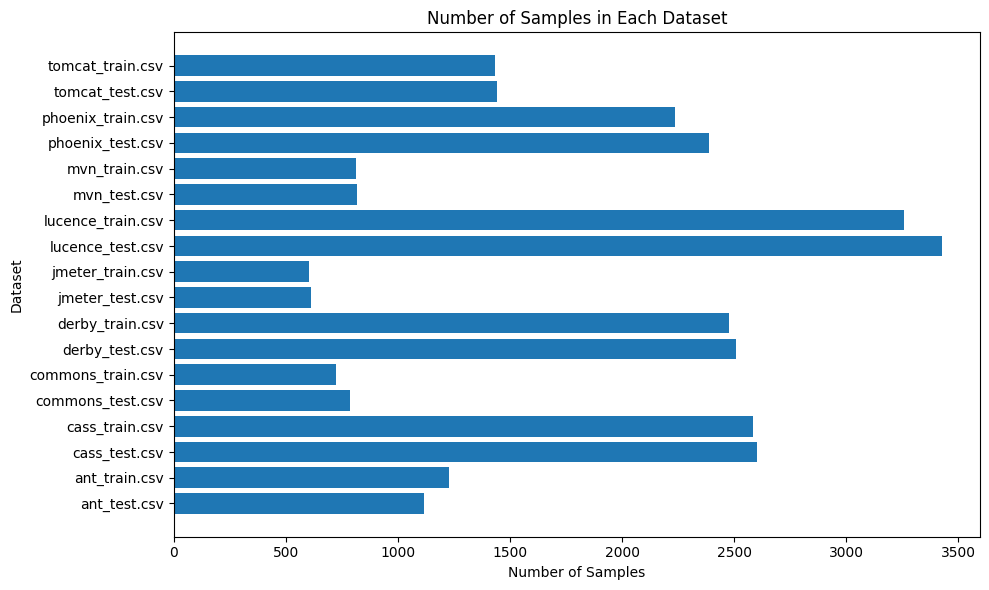

In [2]:
# Path to your datasets folder
folder_path = '../dataset'

# Dictionary to store sample counts for each dataset
sample_counts = {}

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Full path to the CSV file
        file_path = os.path.join(folder_path, filename)
        
        # Read the dataset and count the samples (rows)
        df = pd.read_csv(file_path)
        sample_counts[filename] = len(df)

# Plotting the sample counts as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(sample_counts.keys()), list(sample_counts.values()))
plt.xlabel('Number of Samples')
plt.ylabel('Dataset')
plt.title('Number of Samples in Each Dataset')
plt.tight_layout()
plt.show()


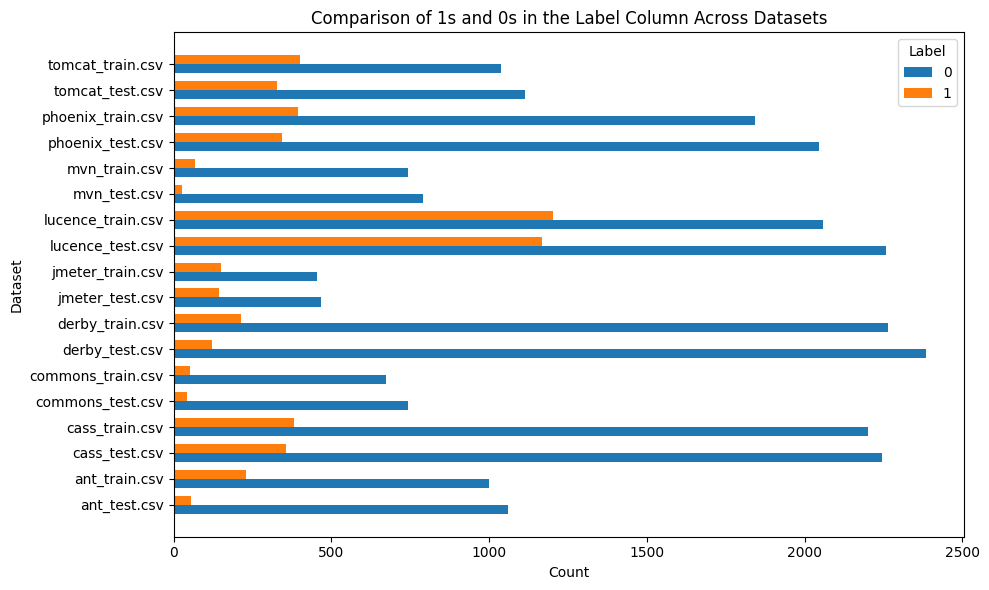

In [3]:
# Path to your datasets folder
folder_path = '../dataset'

# Dictionary to store counts for each dataset
data_counts = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read each dataset
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Count the 1s and 0s in the 'label' column
        counts = df['label'].value_counts()
        zeros = counts.get(0, 0)  # Get count of 0s (default to 0 if not found)
        ones = counts.get(1, 0)   # Get count of 1s (default to 0 if not found)
        
        # Store the counts in the dictionary
        data_counts[filename] = {'0': zeros, '1': ones}

# Convert dictionary to DataFrame for easy plotting
count_df = pd.DataFrame(data_counts).T  # Transpose for easier plotting

# Setting up bar positions and width
datasets = count_df.index
y = np.arange(len(datasets))  # Label locations
height = 0.35  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.barh(y - height/2, count_df['0'], height, label='0')
bar2 = ax.barh(y + height/2, count_df['1'], height, label='1')

# Adding labels, title, and custom y-axis tick labels
ax.set_ylabel('Dataset')
ax.set_xlabel('Count')
ax.set_title('Comparison of 1s and 0s in the Label Column Across Datasets')
ax.set_yticks(y)
ax.set_yticklabels(datasets)
ax.legend(title='Label')

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
exclude_columns = ['F71-ramkrishna.s.vasudevan@intel.com',
       'F71-jtaylor@salesforce.com', 'F71-jamestaylor@apache.org',
       'F71-tdsilva@salesforce.com', 'F71-ndimiduk@apache.org',
       'F71-twdsilva@gmail.com', 'F71-samarth.jain@salesforce.com',
       'F71-jeffreyz@apache.org', 'F71-enis@apache.org',
       'F71-maryannxue@apache.org', 'F71-jzhong@JZhongs-MacBook-Pro.local',
       'F71-elilevine@apache.org', 'F71-stoens@apache.org',
       'F71-gabrielr@ngdata.com', 'F71-rajeshbabu@apache.org',
       'F71-ramkrishna.s.vasudevan@gmail.com', 'F71-mujtaba@apache.org',
       'F71-wei.xue@intel.com']

train_data = pd.read_csv('../dataset/phoenix_train.csv')
train_data = train_data.drop(columns=exclude_columns)
test_data = pd.read_csv('../dataset/phoenix_test.csv')
test_data = test_data.drop(columns=exclude_columns)

train_data.columns

Index(['F72', 'F25', 'F65', 'F68', 'F101', 'F104', 'F105', 'F15-NA',
       'F15-private', 'F15-protected', 'F15-public', 'F22', 'F123', 'F77',
       'F41', 'F126', 'label'],
      dtype='object')

In [6]:
train_data['label'].describe()

count    2235.000000
mean        0.175839
std         0.380768
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

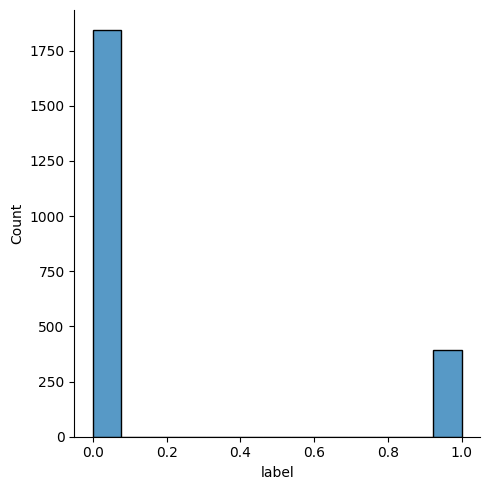

In [7]:
sns.displot(train_data['label']);

label
0    0.824161
1    0.175839
Name: proportion, dtype: float64


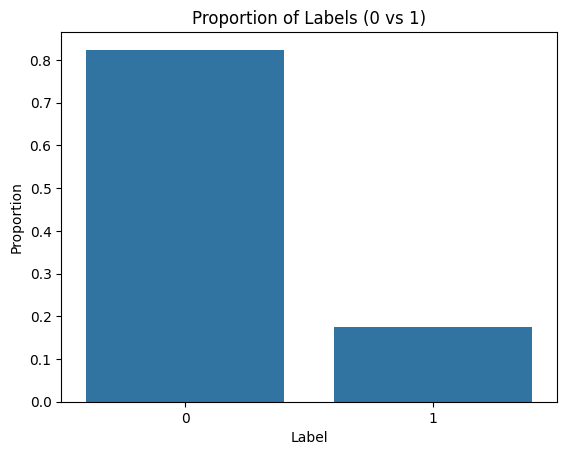

In [8]:
# Calculate proportions
label_counts = train_data['label'].value_counts(normalize=True)  # Normalize gives proportions
print(label_counts)  # Display proportions in the console

sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.title('Proportion of Labels (0 vs 1)')
plt.show()


In [9]:
#skewness and kurtosis
print("Skewness: %f" % train_data['label'].skew())
print("Kurtosis: %f" % train_data['label'].kurt())

Skewness: 1.704194
Kurtosis: 0.905085


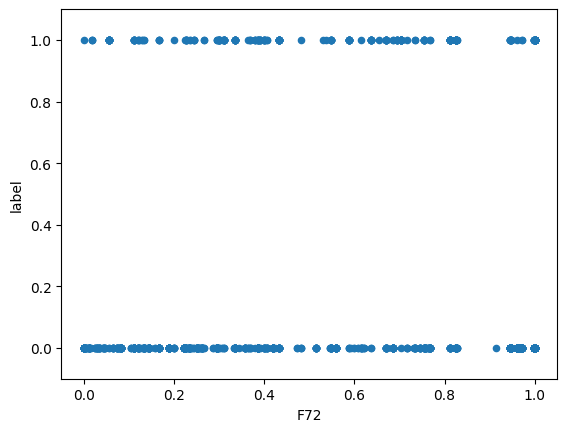

In [10]:
#scatter plot F72/label
var = 'F72'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

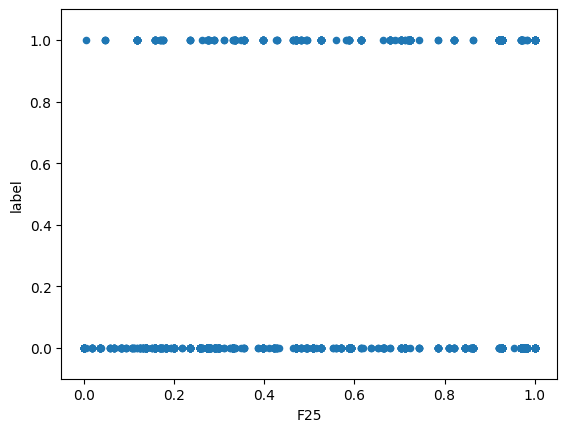

In [11]:
#scatter plot F25/label
var = 'F25'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

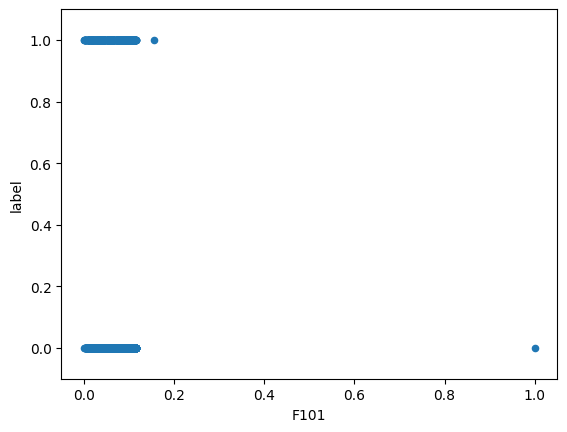

In [12]:
#scatter plot F101/label
var = 'F101'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

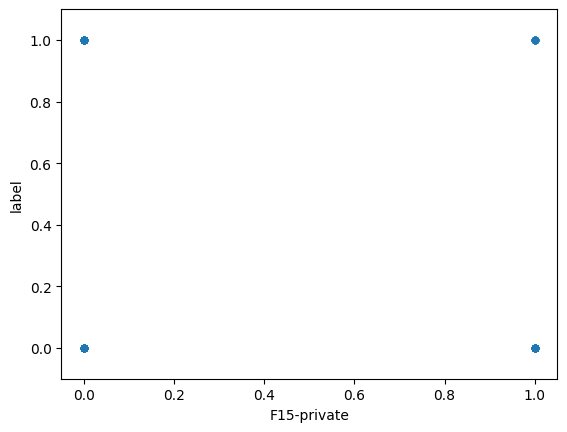

In [13]:
#scatter plot F15-private/label
var = 'F15-private'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

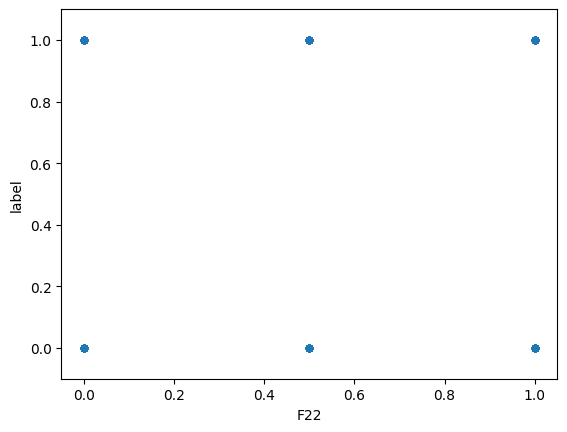

In [14]:
#scatter plot F22/label
var = 'F22'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

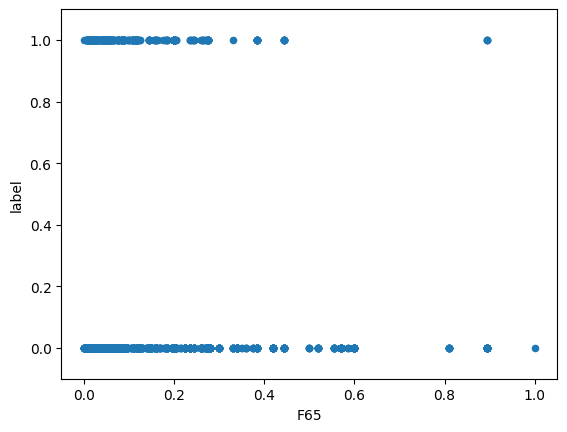

In [15]:
#scatter plot F65/label
var = 'F65'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(-0.1,1.1));

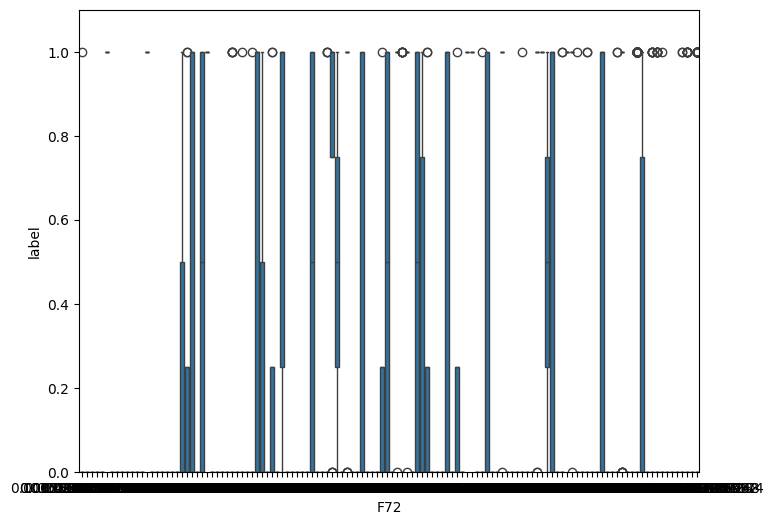

In [16]:
#box plot F72/label
var = 'F72'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="label", data=data)
fig.axis(ymin=0, ymax=1.1);

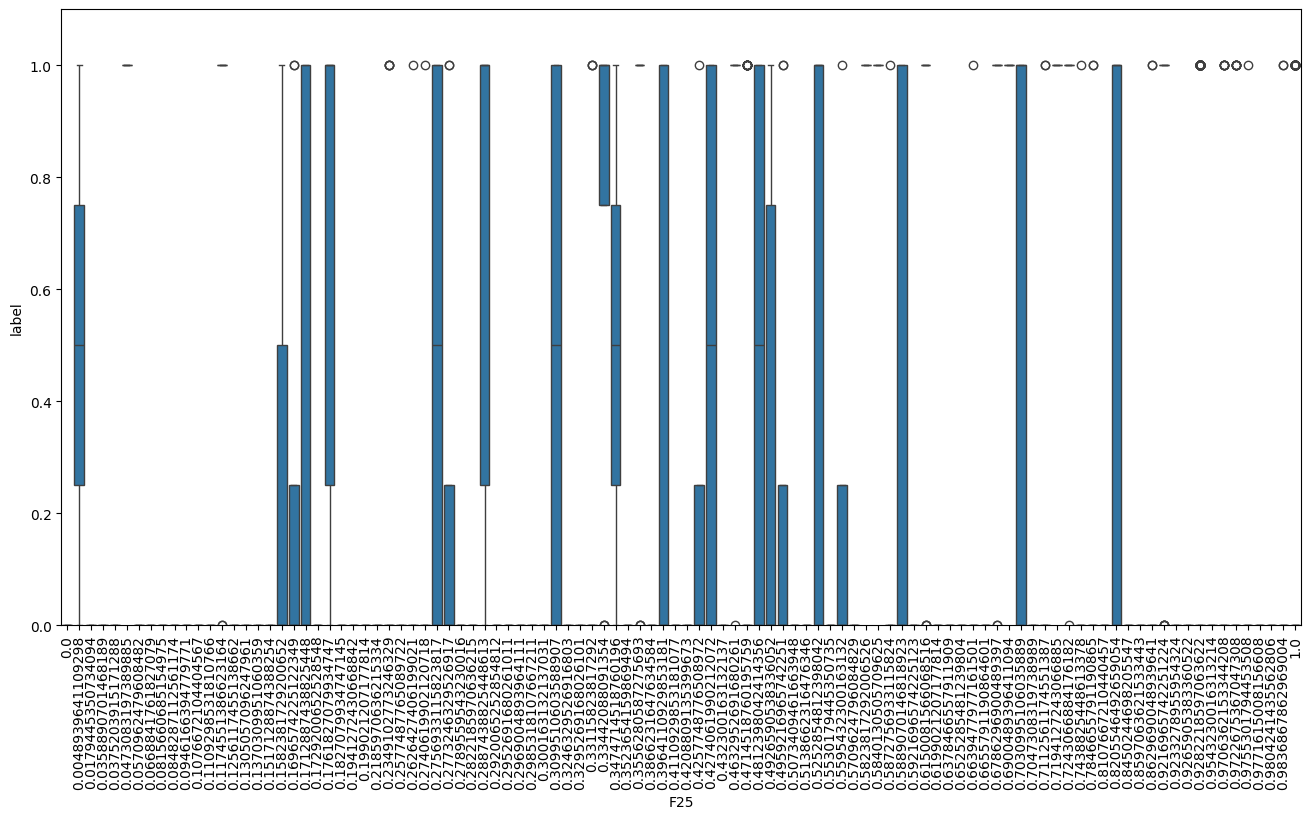

In [17]:
var = 'F25'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="label", data=data)
fig.axis(ymin=0, ymax=1.1);
plt.xticks(rotation=90);

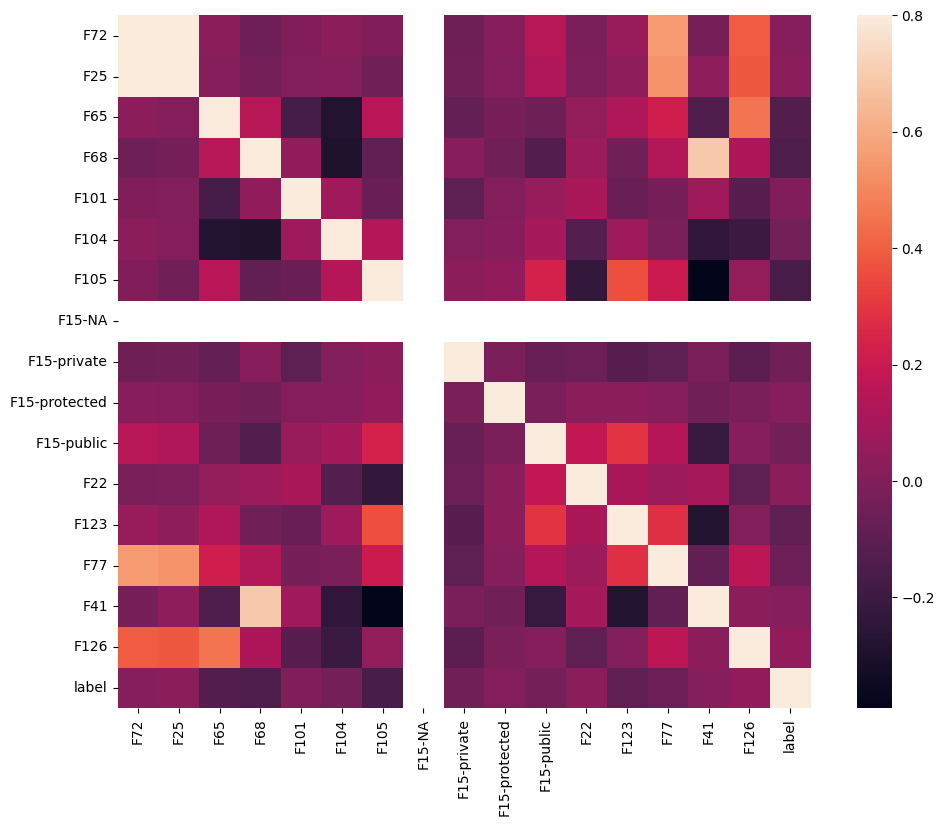

In [18]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

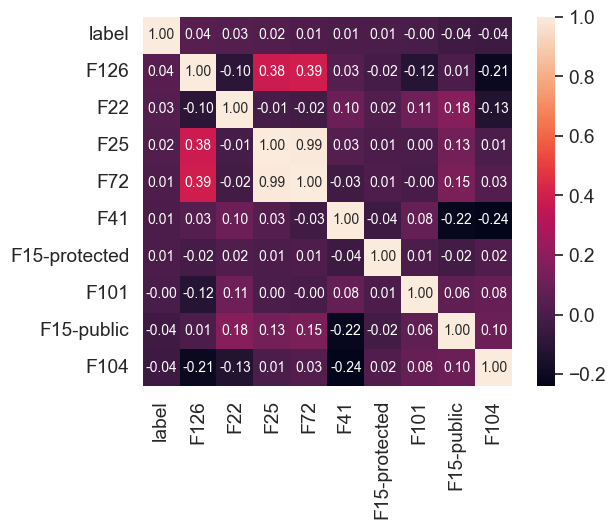

In [19]:
#label correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

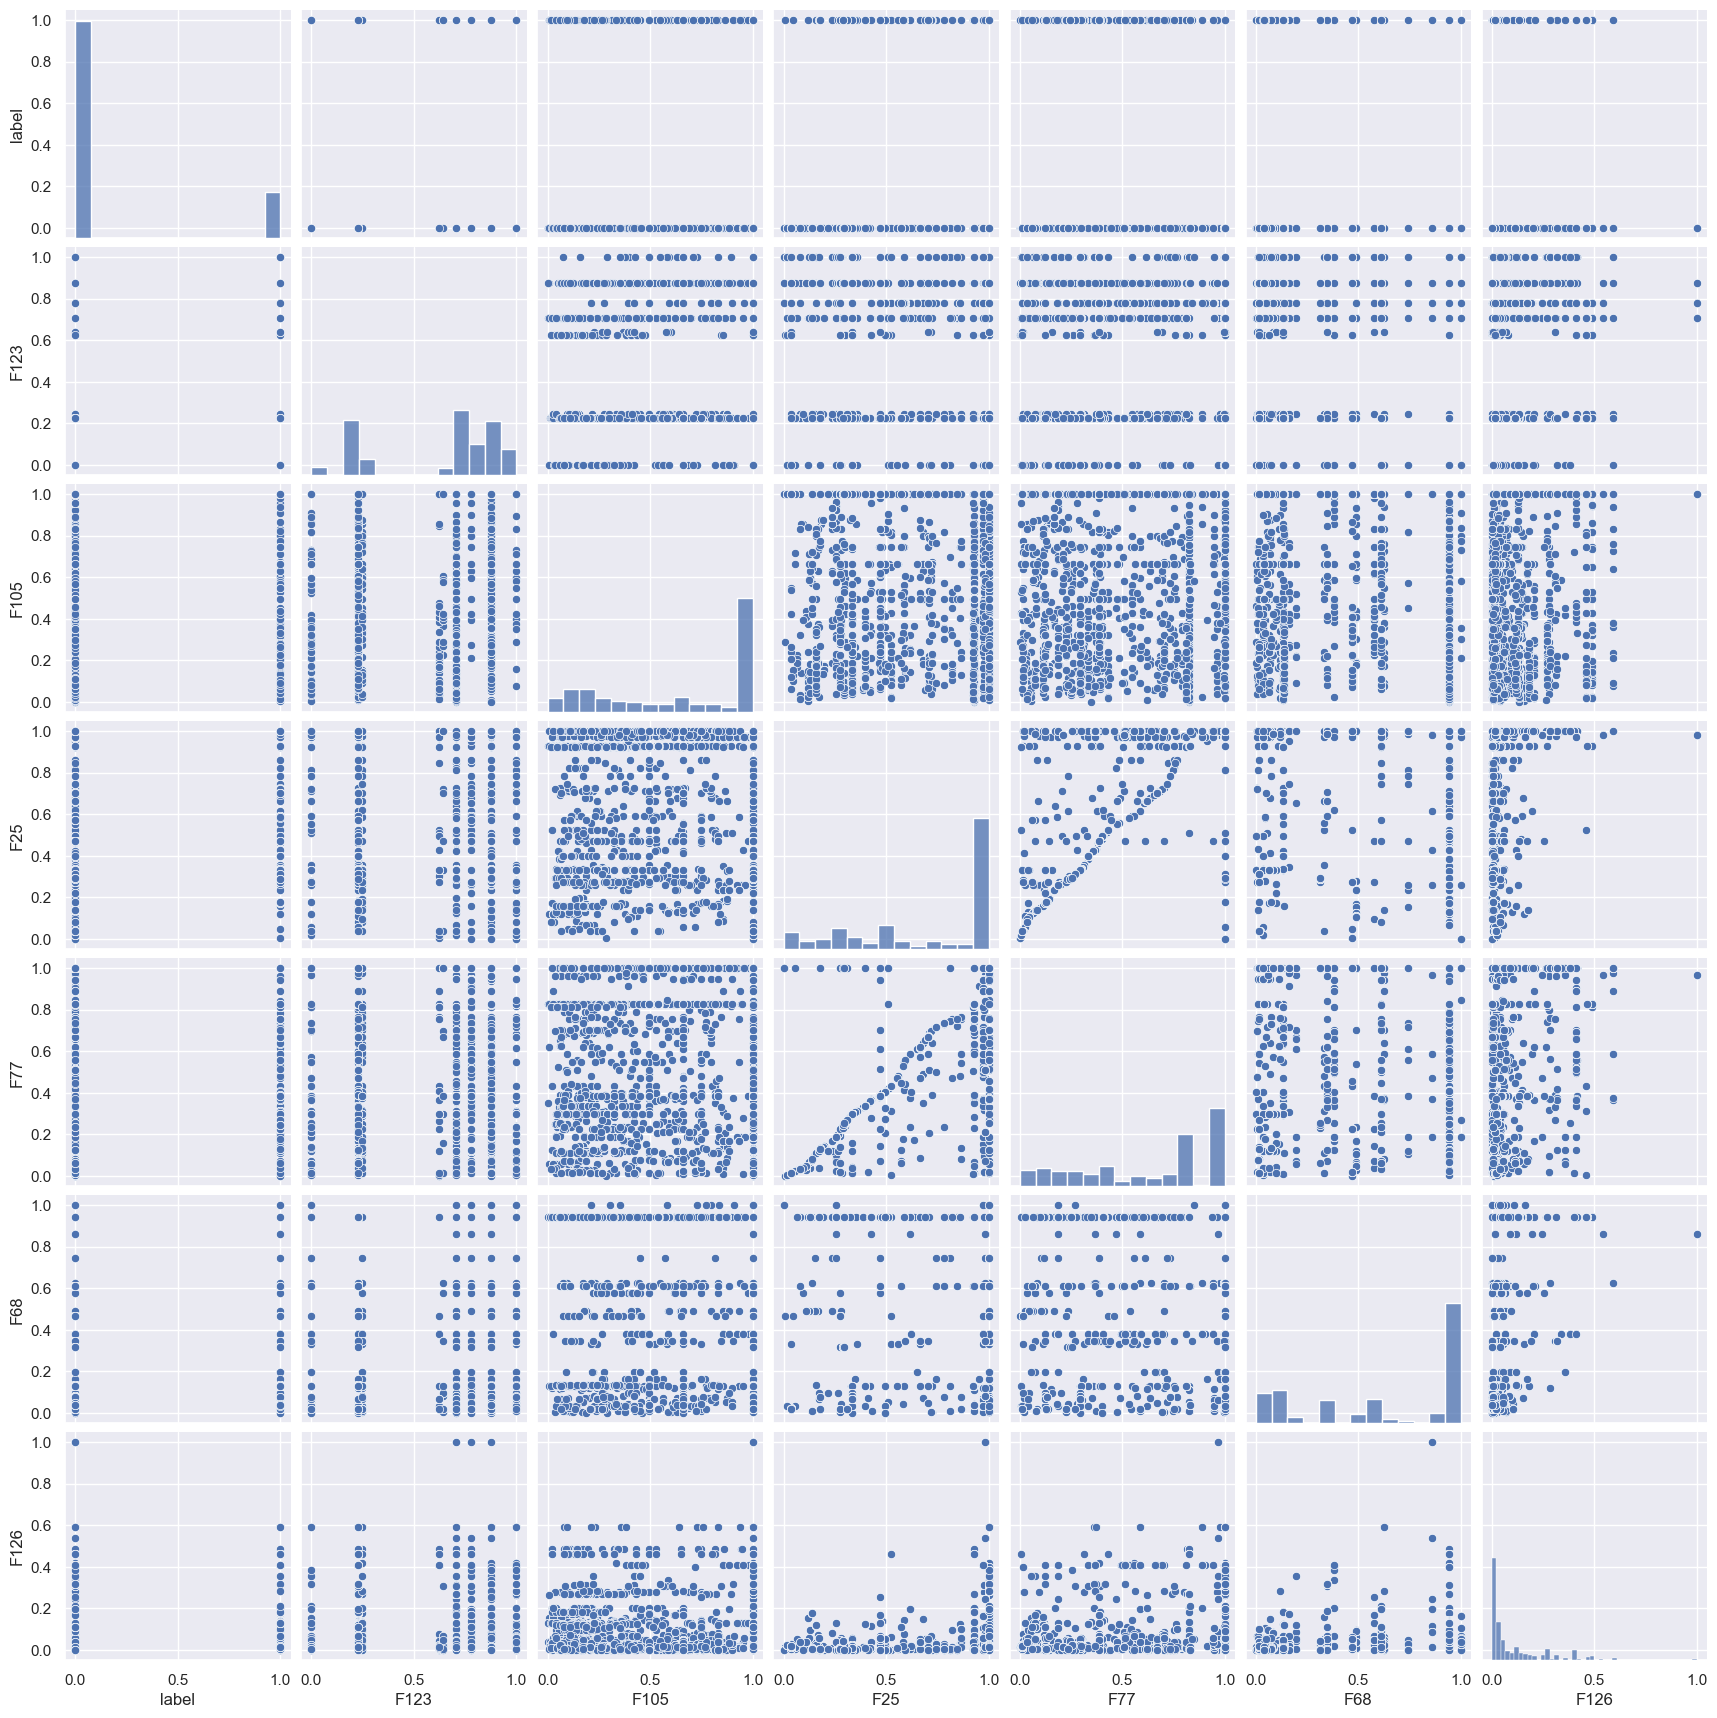

In [20]:
#scatterplot
sns.set()
cols = ['label', 'F123', 'F105', 'F25', 'F77', 'F68', 'F126']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [21]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
F72,0,0.0
F15-protected,0,0.0
F126,0,0.0
F41,0,0.0
F77,0,0.0
F123,0,0.0
F22,0,0.0
F15-public,0,0.0
F15-private,0,0.0
F25,0,0.0


In [22]:

# Convert 'label' to a NumPy array and reshape it
label_array = train_data['label'].to_numpy().reshape(-1, 1)

# Standardize the data
label_scaled = StandardScaler().fit_transform(label_array)

# Find low and high ranges
low_range = label_scaled[label_scaled[:, 0].argsort()][:10]
high_range = label_scaled[label_scaled[:, 0].argsort()][-10:]

# Print the results
print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]
 [-0.46190372]]

Outer range (high) of the distribution:
[[2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]
 [2.16495333]]


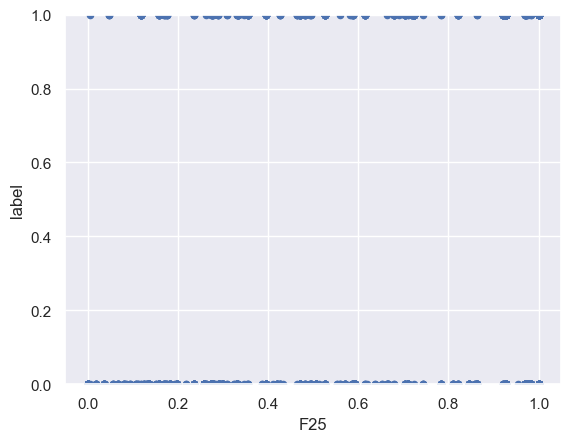

In [23]:
#bivariate analysis label/F25
var = 'F25'
data = pd.concat([train_data['label'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='label', ylim=(0,1));

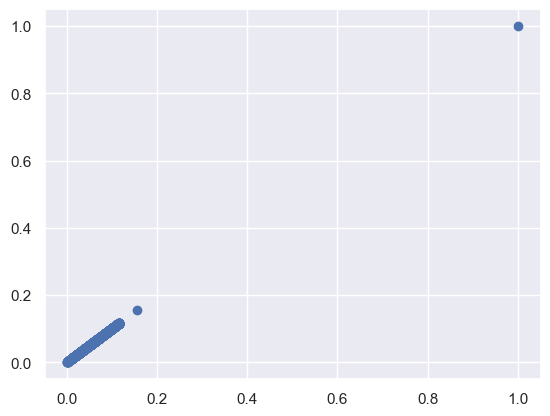

In [24]:
#scatter plot
plt.scatter(train_data[train_data['F101']>0]['F101'], train_data[train_data['F101']>0]['F101']);

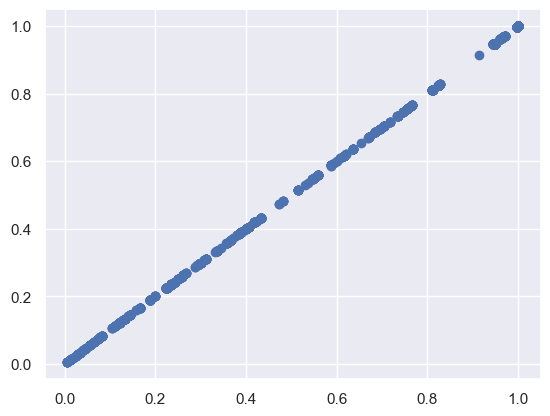

In [25]:
#scatter plot
plt.scatter(train_data[train_data['F72']>0]['F72'], train_data[train_data['F72']>0]['F72']);

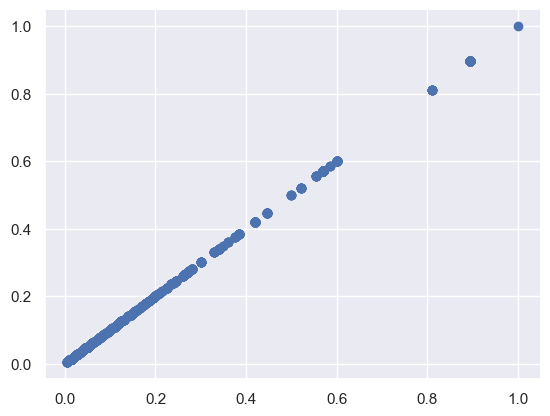

In [26]:
#scatter plot
plt.scatter(train_data[train_data['F65']>0]['F65'], train_data[train_data['F65']>0]['F65']);

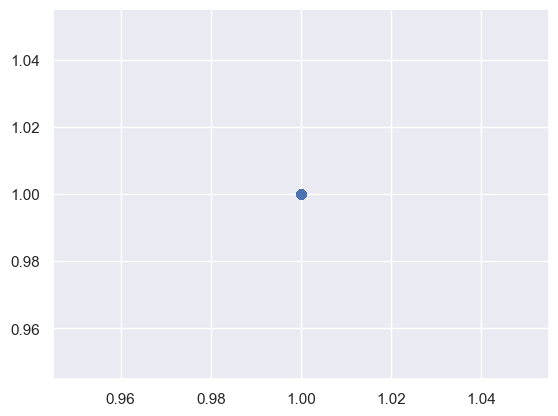

In [27]:
#scatter plot
plt.scatter(train_data[train_data['F15-public']>0]['F15-public'], train_data[train_data['F15-public']>0]['F15-public']);

In [28]:
train_data = pd.get_dummies(train_data)

In [29]:
train_data

,F72,F25,F65,F68,F101,F104,F105,F15-NA,F15-private,F15-protected,F15-public,F22,F123,F77,F41,F126,label
0,0.745370,0.810767,0.015,0.010870,0.065327,0.206702,0.344086,0.0,0.0,0.0,0.0,0.5,0.247168,0.745370,0.000000,0.000678,0
1,0.637037,0.678630,0.050,0.070652,0.029263,0.141916,0.815694,0.0,0.0,0.0,0.0,0.5,0.777194,0.351852,0.000000,0.012032,1
2,0.637037,0.678630,0.050,0.070652,0.028801,0.141916,0.631387,0.0,0.0,0.0,0.0,0.5,0.777194,0.637037,0.000000,0.012032,1
3,0.637037,0.678630,0.050,0.070652,0.021643,0.141916,0.815694,0.0,0.0,0.0,0.0,0.5,0.777194,0.351852,0.000000,0.012032,1
4,0.637037,0.678630,0.050,0.070652,0.021181,0.141916,0.631387,0.0,0.0,0.0,0.0,0.5,0.777194,0.637037,0.000000,0.012032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,0.828704,0.928222,0.040,0.038043,0.059509,0.067668,0.662105,0.0,0.0,0.0,0.0,1.0,0.876675,0.828704,0.000661,0.015930,1
2231,0.828704,0.928222,0.030,0.038043,0.067118,0.137772,0.662105,0.0,0.0,0.0,0.0,1.0,0.876675,0.828704,0.000661,0.000339,0
2232,0.828704,0.928222,0.030,0.038043,0.074212,0.137772,0.493157,0.0,0.0,0.0,0.0,1.0,0.876675,0.828704,0.000661,0.000339,0
2233,0.828704,0.928222,0.030,0.038043,0.095495,0.137772,0.493157,0.0,0.0,0.0,0.0,1.0,0.876675,0.828704,0.000661,0.000339,0


In [30]:
test_data

,F72,F25,F65,F68,F101,F104,F105,F15-NA,F15-private,F15-protected,F15-public,F22,F123,F77,F41,F126,label
0,0.776241,0.836182,0.015,0.010811,0.065331,0.207376,0.349562,0.0,0.0,0.0,0.0,0.5,0.375223,0.775510,0.000000,0.000943,0
1,0.681041,0.720798,0.050,0.075676,0.029267,0.142644,0.817232,0.0,0.0,0.0,0.0,0.5,0.796497,0.428571,0.002950,0.016745,1
2,0.681041,0.720798,0.050,0.075676,0.028805,0.142644,0.634465,0.0,0.0,0.0,0.0,0.5,0.796497,0.680000,0.002950,0.016745,1
3,0.681041,0.720798,0.050,0.075676,0.021647,0.142644,0.817232,0.0,0.0,0.0,0.0,0.5,0.796497,0.428571,0.002950,0.016745,1
4,0.681041,0.720798,0.050,0.075676,0.021185,0.142644,0.634465,0.0,0.0,0.0,0.0,0.5,0.796497,0.680000,0.002950,0.016745,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0.849471,0.938746,0.030,0.032432,0.074216,0.138504,0.497389,0.0,0.0,0.0,0.0,1.0,0.857004,0.848980,0.008428,0.000472,0
2385,0.849471,0.938746,0.030,0.032432,0.095498,0.138504,0.497389,0.0,0.0,0.0,0.0,1.0,0.857004,0.848980,0.008428,0.000472,0
2386,0.849471,0.938746,0.030,0.032432,0.084148,0.138504,0.497389,0.0,0.0,0.0,0.0,1.0,0.857004,0.848980,0.008428,0.000472,0
2387,0.036615,0.032764,0.025,0.027027,0.055364,0.083596,1.000000,0.0,0.0,0.0,0.0,1.0,0.857004,0.033469,0.105352,0.038915,0
